In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# tryig to set the target variable as the fatal or non fatal accindents in France metropolitan area

In [2]:
df = pd.read_csv("./data/merged_tables.csv", index_col=0)

df.info()


C:\Users\tiago\AppData\Local\Temp\ipykernel_10056\3491915842.py:1: DtypeWarning: Columns (13,19,25,27,30,32,39,40,42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./data/merged_tables.csv", index_col=0)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2509598 entries, 201900000001 to 201800057783
Data columns (total 56 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id_vehicule  float64
 1   num_veh      object 
 2   place        float64
 3   catu         int64  
 4   grav         int64  
 5   sexe         int64  
 6   an_nais      float64
 7   trajet       float64
 8   secu1        float64
 9   secu2        float64
 10  secu3        float64
 11  locp         float64
 12  actp         object 
 13  etatp        float64
 14  secu         float64
 15  an           int64  
 16  mois         int64  
 17  jour         int64  
 18  hrmn         object 
 19  lum          int64  
 20  agg          int64  
 21  int          int64  
 22  atm          float64
 23  col          float64
 24  com          object 
 25  adr          object 
 26  gps          object 
 27  lat          float64
 28  long         float64
 29  dep          object 
 30  catr         float64
 31  voie    

In [27]:
df['an']

Num_Acc
201900000001    2019
201900000001    2019
201900000001    2019
201900000002    2019
201900000003    2019
                ... 
201800057781    2018
201800057782    2018
201800057782    2018
201800057783    2018
201800057783    2018
Name: an, Length: 2509598, dtype: int64

In [3]:
#filter the data from France metroplotian area
Metro_df = df[df['gps'] == 'M']

Metro_df.head(5)

,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,...,vma,env1,senc,catv,occutc,obs,obsm,choc,manv,motor
Num_Acc,,,,,,,,,,,,,,,,,,,,,
201000000001,NaN,A01,1.0,1,3,1,1976.0,5.0,NaN,NaN,...,NaN,0.0,0.0,30,0.0,1.0,0.0,1.0,1.0,NaN
201000000002,NaN,A01,1.0,1,1,2,1983.0,5.0,NaN,NaN,...,NaN,0.0,0.0,7,0.0,0.0,1.0,1.0,1.0,NaN
201000000002,NaN,A01,NaN,3,3,1,1965.0,0.0,NaN,NaN,...,NaN,0.0,0.0,7,0.0,0.0,1.0,1.0,1.0,NaN
201000000003,NaN,A01,1.0,1,3,1,1979.0,5.0,NaN,NaN,...,NaN,0.0,0.0,33,0.0,0.0,2.0,1.0,17.0,NaN
201000000003,NaN,C03,1.0,1,1,2,1959.0,5.0,NaN,NaN,...,NaN,0.0,0.0,7,0.0,0.0,9.0,3.0,23.0,NaN


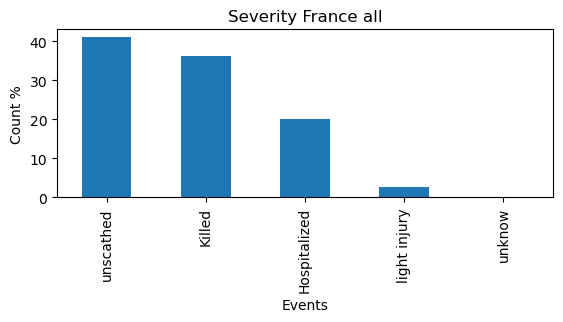

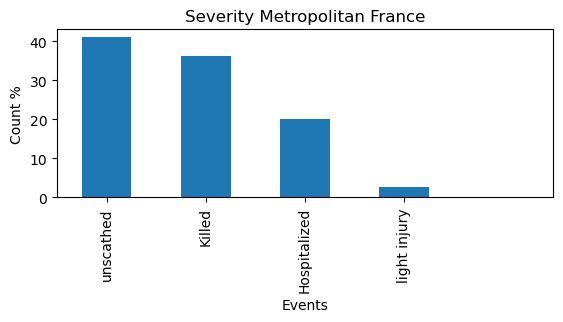

In [4]:
#severity
event_counts = df['grav'].value_counts()
event_percentages = (event_counts / event_counts.sum()) * 100
plt.subplot(2,1,1)
event_percentages.plot.bar()
labels = ['unscathed','Killed','Hospitalized','light injury','unknow']
# Add labels and title to the plot
plt.xticks(range(len(event_percentages)), labels)
plt.xlabel('Events')
plt.ylabel('Count %')
plt.title('Severity France all')
# Display the plot
plt.show()



event_counts_M = Metro_df['grav'].value_counts()
event_percentages_M = (event_counts_M / event_counts_M.sum()) * 100
plt.subplot(2,1,2)
event_percentages.plot.bar()
labels = ['unscathed','Killed','Hospitalized','light injury']
# Add labels and title to the plot
plt.xticks(range(len(event_percentages_M)), labels)
plt.xlabel('Events')
plt.ylabel('Count %')
plt.title('Severity Metropolitan France')
# Display the plot
plt.show()


In [5]:
# create a new variable for the severity ['Grav'] of accidents ( fatal, non-fatal) as a possible target variable

#Create a new variable 'fatality' based on 'severity'
# Create a new binary variable 'fatality' based on 'severity'
Metro_df['fatal'] = np.where(Metro_df['grav'].isin([1, 3, 4]), 0, 1)

# Convert the new variable to binary values
#Metro_df['fatality'] = Metro_df['fatality'].map({'Non-Fatal': 0, 'Fatal': 1})
#Metro_df.info()

#Metro_df['fatal'] 

C:\Users\tiago\AppData\Local\Temp\ipykernel_10056\2729304840.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Metro_df['fatal'] = np.where(Metro_df['grav'].isin([1, 3, 4]), 0, 1)


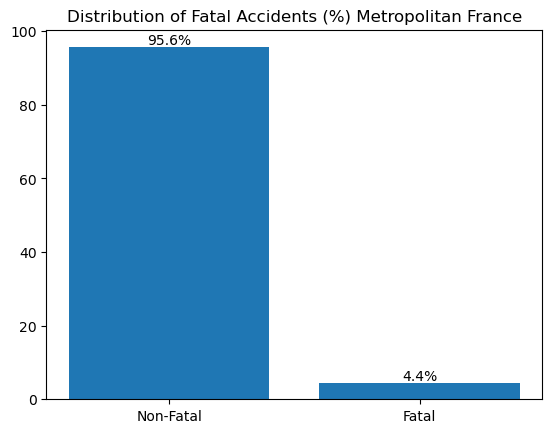

In [6]:
percentage_distribution = Metro_df['fatal'].value_counts(normalize=True) * 100

# Create a bar plot
plt.bar(percentage_distribution.index, percentage_distribution.values)

# Set the x-axis tick labels
plt.xticks(percentage_distribution.index)

# Set the y-axis label to represent percentages

plt.xticks(percentage_distribution.index, ['Non-Fatal', 'Fatal'])
# Set the axis labels and plot title
#plt.xlabel('Fatal')
plt.title('Distribution of Fatal Accidents (%) Metropolitan France')
# Show labels on top of bars
for i, v in enumerate(percentage_distribution.values):
    plt.text(i, v, f"{v:.1f}%", ha='center', va='bottom')

# Display the plot
plt.show()

In [18]:
Metro_df['dep']

Num_Acc
201000000001    590
201000000002    590
201000000002    590
201000000003    590
201000000003    590
               ... 
201800055764    750
201800055765    750
201800055765    750
201800055766    750
201800055766    750
Name: dep, Length: 1054884, dtype: object

In [22]:
Metro_df['dep'] = Metro_df['dep'].astype(int)

Metro_df['dep'].describe()


C:\Users\tiago\AppData\Local\Temp\ipykernel_10056\959458654.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Metro_df['dep'] = Metro_df['dep'].astype(int)


count    1.054884e+06
mean     5.054909e+02
std      2.759793e+02
min      1.000000e+01
25%      2.900000e+02
50%      5.000000e+02
75%      7.500000e+02
max      9.760000e+02
Name: dep, dtype: float64

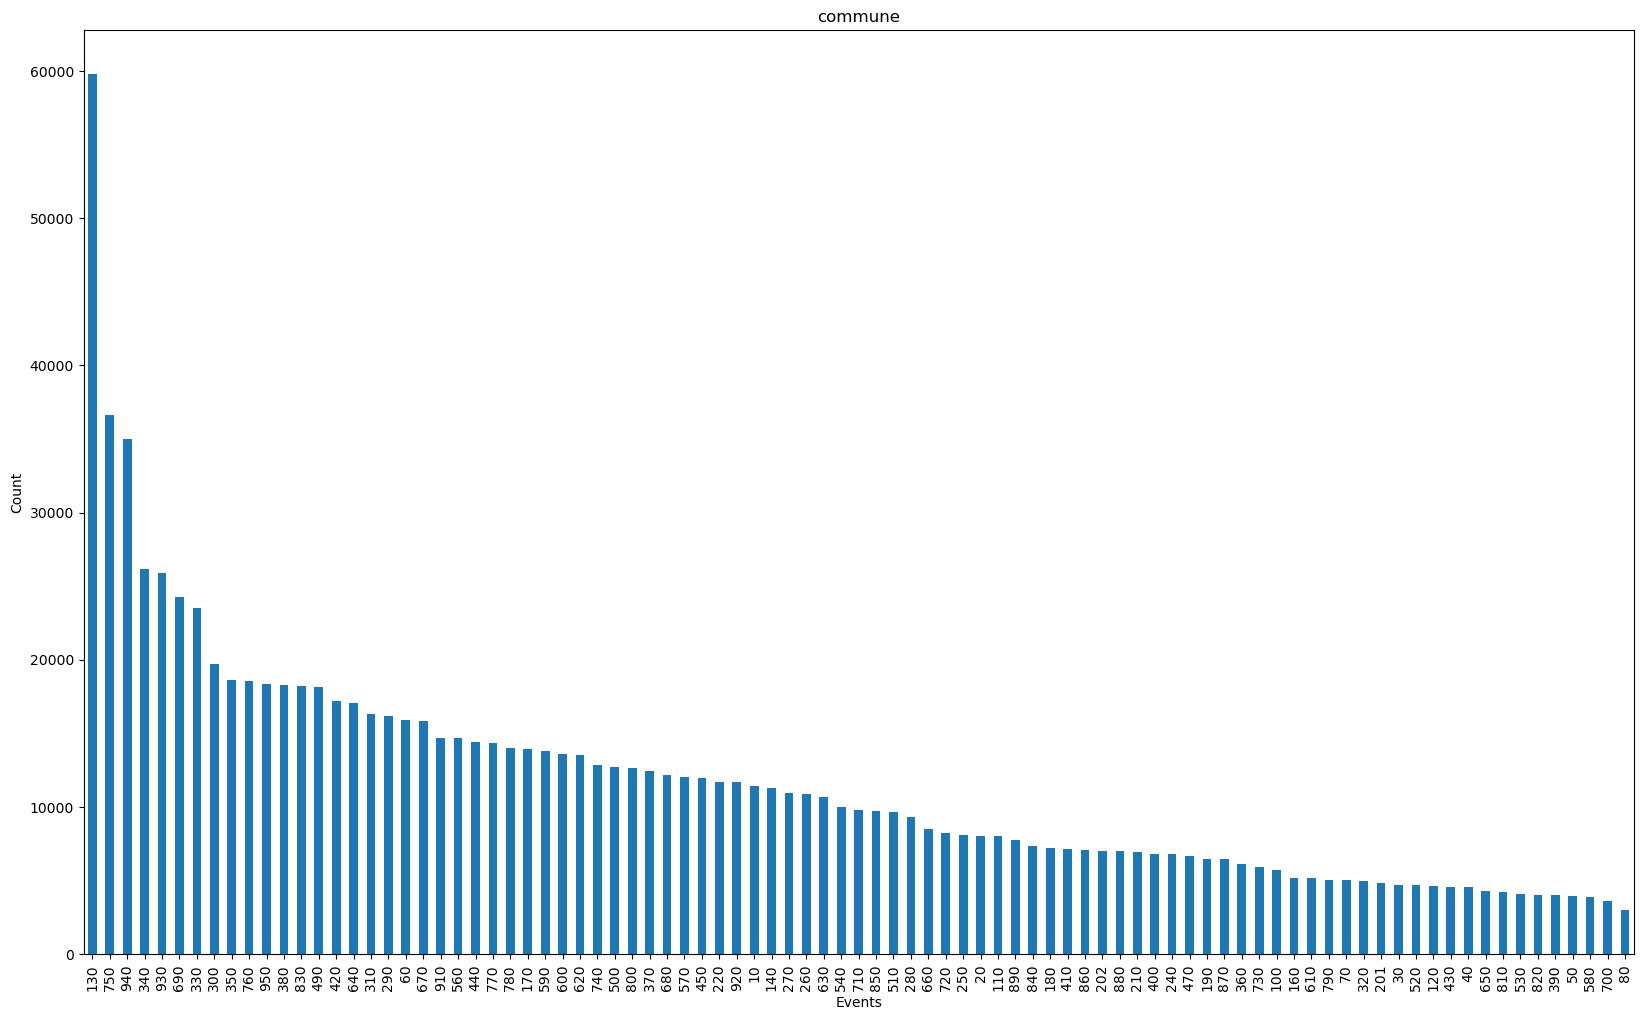

In [21]:
plt.figure(figsize=(20,12))
event_counts = Metro_df['dep'].value_counts()
event_counts_filtered = event_counts[event_counts > 3000]

event_counts_filtered.plot.bar()

plt.xticks(rotation=90)
plt.xlabel('Events')
plt.ylabel('Count')
plt.title('commune')
# Display the plot
plt.show()

In [36]:
Metro_df['jour'].describe()

count    1.054884e+06
mean     1.564186e+01
std      8.764030e+00
min      1.000000e+00
25%      8.000000e+00
50%      1.600000e+01
75%      2.300000e+01
max      3.100000e+01
Name: jour, dtype: float64

In [40]:
Metro_df['datetime'] = pd.to_datetime(
    Metro_df['jour'].astype(str) + '-' +
    Metro_df['mois'].astype(str) + '-' +
    Metro_df['an'].astype(str),
    format='%d-%m-%Y'
)



C:\Users\tiago\AppData\Local\Temp\ipykernel_10056\1175694024.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Metro_df['datetime'] = pd.to_datetime(


In [52]:
Metro_df['fatal']

Num_Acc
201000000001    0
201000000002    0
201000000002    0
201000000003    0
201000000003    0
               ..
201800055764    0
201800055765    0
201800055765    0
201800055766    0
201800055766    0
Name: fatal, Length: 1054884, dtype: int32

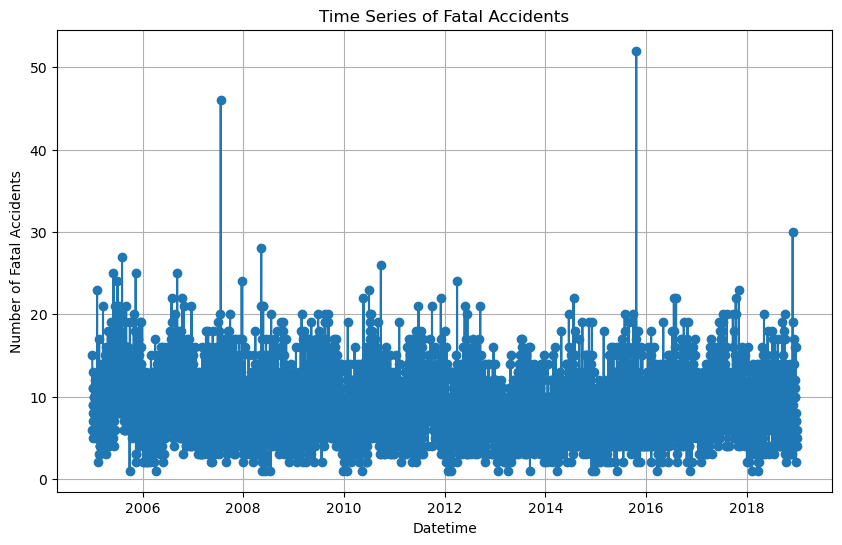

In [55]:
#time series of fatal accidents

fatal_counts = Metro_df[Metro_df['fatal'] == 1]['datetime'].value_counts().sort_index()

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(fatal_counts.index, fatal_counts.values, marker='o')
plt.xlabel('Datetime')
plt.ylabel('Number of Fatal Accidents')
plt.title('Time Series of Fatal Accidents')
plt.grid(True)
plt.show()

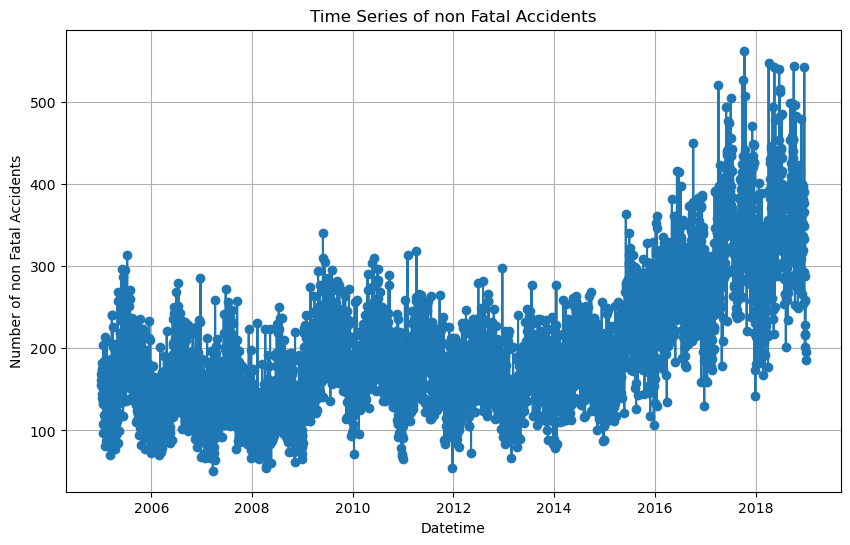

In [57]:
#time series of non fatal accidents
fatal_counts = Metro_df[Metro_df['fatal'] == 0]['datetime'].value_counts().sort_index()

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(fatal_counts.index, fatal_counts.values, marker='o')
plt.xlabel('Datetime')
plt.ylabel('Number of non Fatal Accidents')
plt.title('Time Series of non Fatal Accidents')
plt.grid(True)
plt.show()

